# Data Analysis - 15 years of GDP and Life Expectancy Evolution (by Country)
Small Project from the Codecademy curriculum.

### Info, head and describe methods to explore basic variable characteristics

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import statsmodels.api as sm

data = pd.read_csv("all_data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [165]:
data.describe(include = "all")

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


In [166]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Quick View of GDP and Life Expectancy Evolution 

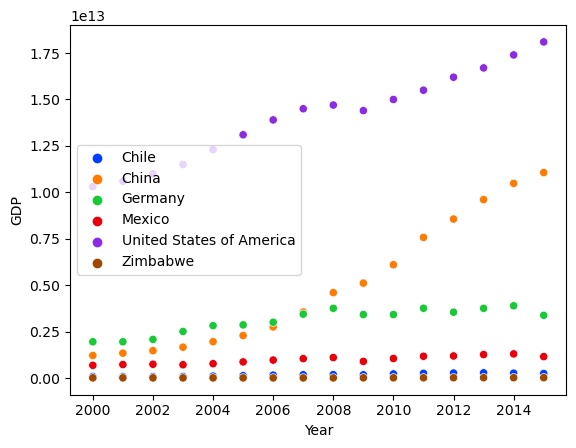

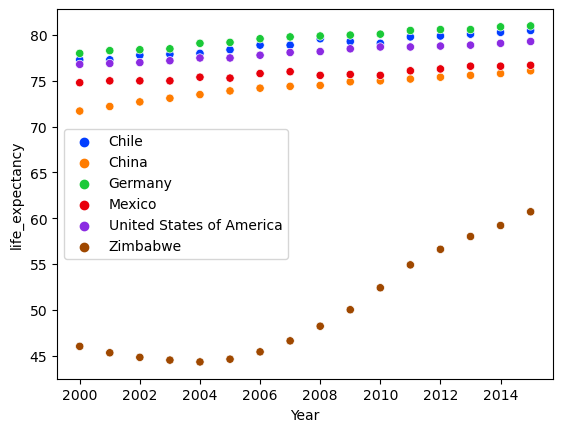

<Figure size 640x480 with 0 Axes>

In [167]:
sns.scatterplot(data=data, x="Year", y="GDP", hue="Country", palette="bright")
plt.legend(loc="center left")
plt.show()
plt.clf()

data.rename(columns={"Life expectancy at birth (years)":"life_expectancy"}, inplace=True)
sns.scatterplot(data=data, x="Year", y="life_expectancy", hue="Country", palette="bright")
plt.legend(loc="center left")
plt.show()
plt.clf()

### Checking for a Possible Relation between GDP and Life Expectancy (Globally)

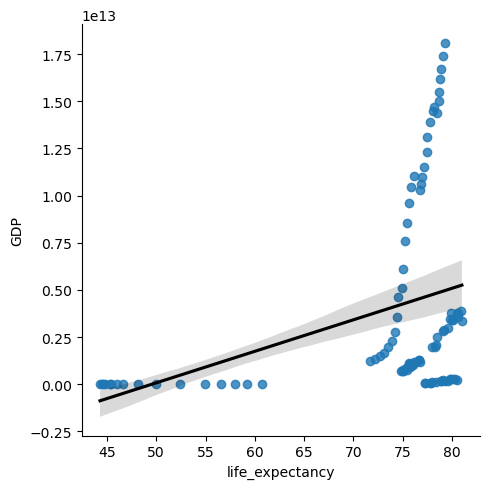

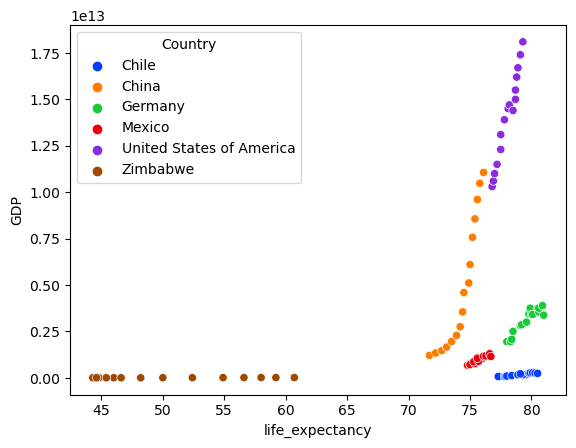

<Figure size 640x480 with 0 Axes>

In [168]:
sns.lmplot(x="life_expectancy", y="GDP", data=data, line_kws={"color":"black"})
plt.show()
plt.clf()

sns.scatterplot(data=data, x="life_expectancy", y="GDP", hue="Country", palette="bright")
plt.show()
plt.clf()

	Both scatters are inconclusive, meaning that no relation appears to be happening between these variables.

# Checking for a Possible Relation between GDP and Life Expectancy (by country)

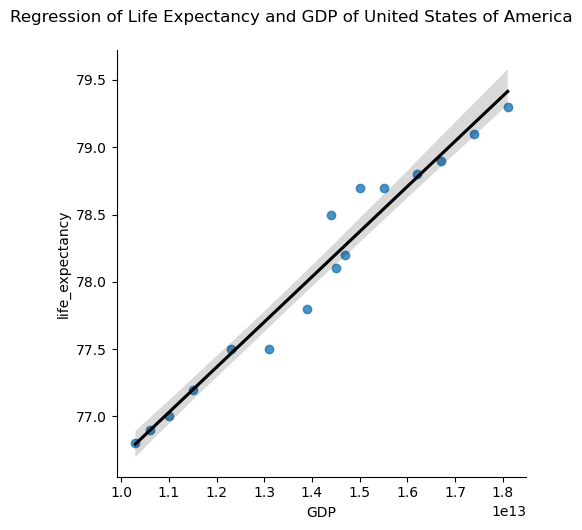

Pearson's correlation coeficient for Life Expectancy and GDP in United States of America is: 0.9817092382430256


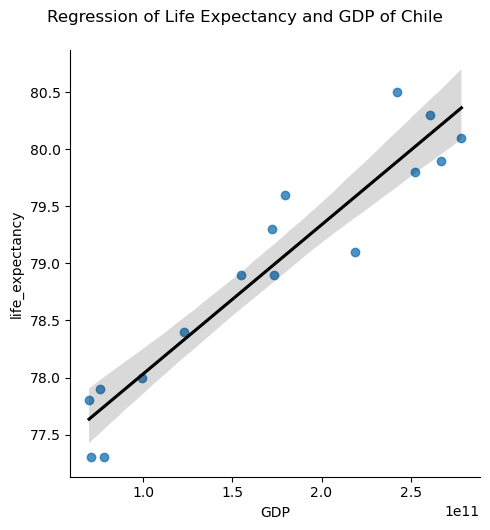

Pearson's correlation coeficient for Life Expectancy and GDP in Chile is: 0.9498766659254417


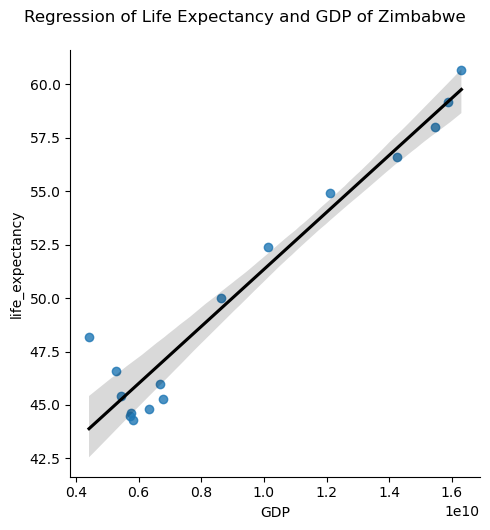

Pearson's correlation coeficient for Life Expectancy and GDP in Zimbabwe is: 0.9661998955858779


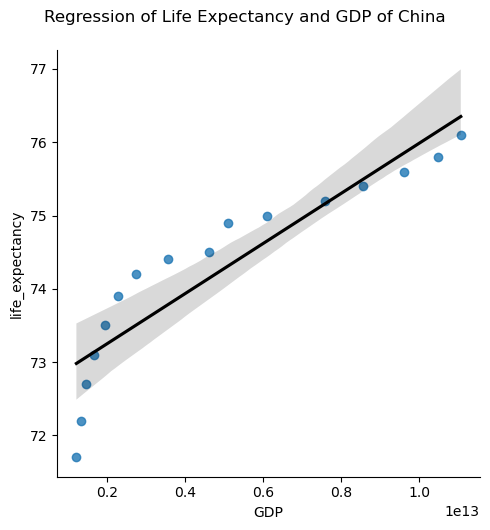

Pearson's correlation coeficient for Life Expectancy and GDP in China is: 0.9085255408648356


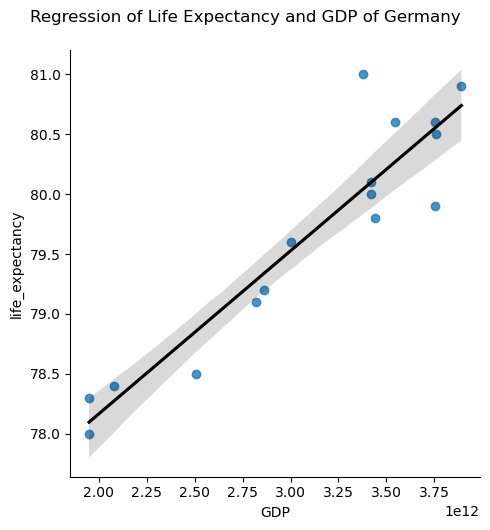

Pearson's correlation coeficient for Life Expectancy and GDP in Germany is: 0.9326988982561274


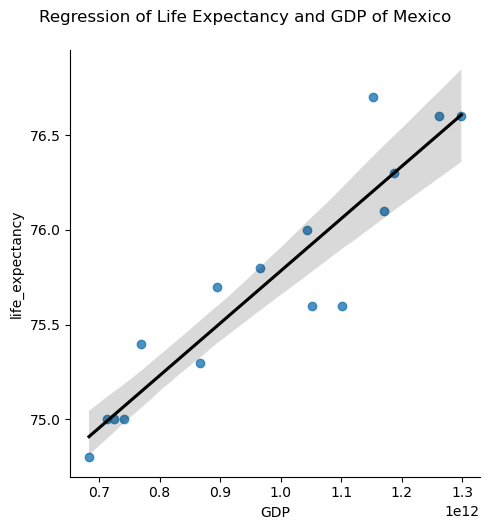

Pearson's correlation coeficient for Life Expectancy and GDP in Mexico is: 0.9322377167847082


Rate at which life expectancy grows for each increase in GDP in United States of America
3.359806240847108e-13
Life Expectancy in the year 2000 in United States of America
76.8
Rate at which life expectancy grows for each increase in GDP in Chile
1.3083371929435293e-11
Life Expectancy in the year 2000 in Chile
77.3
Rate at which life expectancy grows for each increase in GDP in Zimbabwe
1.3352988082268312e-09
Life Expectancy in the year 2000 in Zimbabwe
46.0
Rate at which life expectancy grows for each increase in GDP in China
3.4202188071268063e-13
Life Expectancy in the year 2000 in China
71.7
Rate at which life expectancy grows for each increase in GDP in Germany
1.3623972458403235e-12
Life Expectancy in the year 2000 in Germany
78.0
Rate at which life expectancy grows for each increase in GDP in Mexico
2.762337489108494e-12
Life Expectancy in the year 2000 in Mexico
74.8


In [169]:
countries = ["United States of America", "Chile", "Zimbabwe", "China", "Germany", "Mexico"]
aux_dict = {}
for country in countries:
    data_aux = data[data.Country == country]
    lmplot = sns.lmplot(x="GDP", y="life_expectancy", data=data_aux, line_kws={"color": "black"})
    lmplot.fig.suptitle("Regression of Life Expectancy and GDP of " + str(country), y=1.05)
    plt.show()
    # Getting the Pearson's coeficient of correlation for further understanding.
    y_aux = data_aux["life_expectancy"]
    x_aux = data_aux.GDP
    corr = np.corrcoef(x_aux, y_aux)
    print("Pearson's correlation coeficient for Life Expectancy and GDP in " + str(country) + " is: " + str(corr[0][1]))
    model = sm.OLS.from_formula('life_expectancy ~ GDP', data = data_aux)
    results = model.fit()
    aux_dict[country] = [results.params[0], results.params[1]]
print("\n")

for key in aux_dict.keys():
    print("Rate at which life expectancy grows for each increase in GDP in " + str(key))
    print(aux_dict[key][1])
    print("Life Expectancy in the year 2000 in " + str(key))
    aux = data[data.Country == key]
    aux2 = aux.life_expectancy[aux.Year == 2000]
    print(aux2.iloc[0])


### First Conclusive Statement
During the period from 2000 to 2015, there was a proportional growth between GDP and life expectancy in the countries included in our study (see the list of countries above). Based on a simple inertia argument, one could argue that this covariance between GDP and life expectancy remains significant in the present.
However, it has been demonstrated that the rates at which life expectancy increases with GDP vary across countries. This difference is explained by the linear regression independent coefficient, which in all countries represents the lower life expectancy in the year in the first pe. For instance, Zimbabwe's population experienced a growth rate in life expectancy (for each increase in GDP) around 10,000 times higher than that of China or the United States, yet Zimbabweans lived 30 years less than individuals in the latter two countries. This discrepancy can be attributed to recent medical and infrastructural advancements in Zimbabwe, which the other countries already had in place by the year 2000. In other words, Zimbabwe started the century at a significantly lower level, and its efforts to improve various factors contributing to basic health have led to a higher rate of increase in life expectancy. This is because the other countries were already "well established" in terms of overall health, as evidenced by their life expectancy in the year 2000.

## Explaining the 10000 factor difference in growth rates


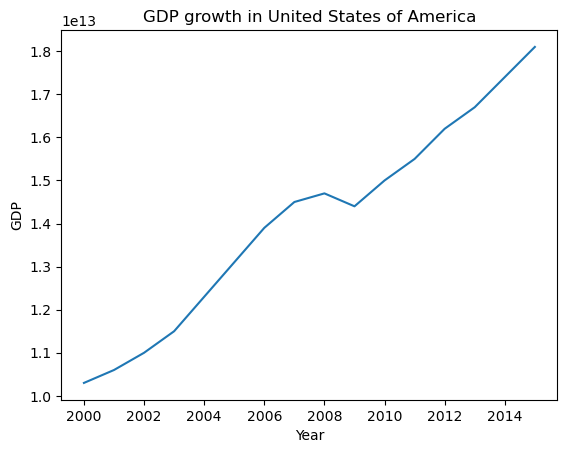

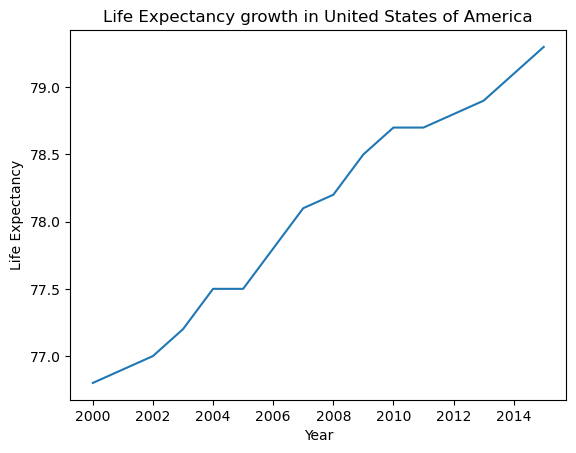



Absolute intervals of life expectancy in United States of America
2.5
Absolute intervals of GDP in United States of America
7.8e+12


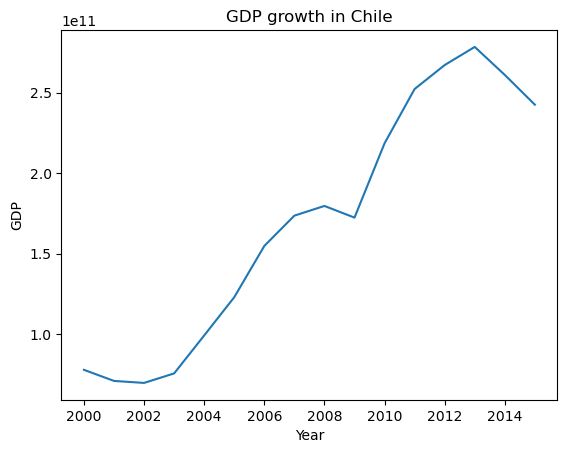

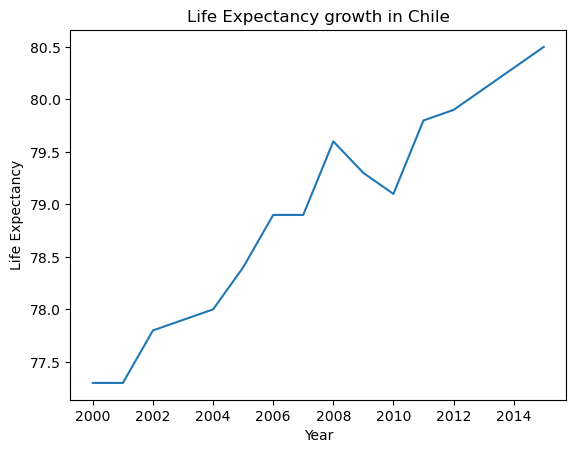



Absolute intervals of life expectancy in Chile
3.2
Absolute intervals of GDP in Chile
2.08647188565e+11


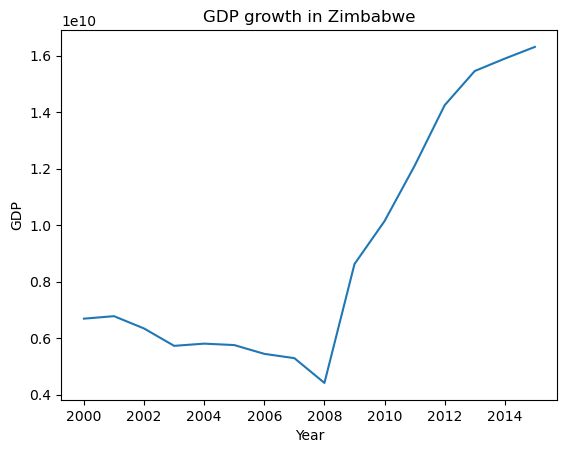

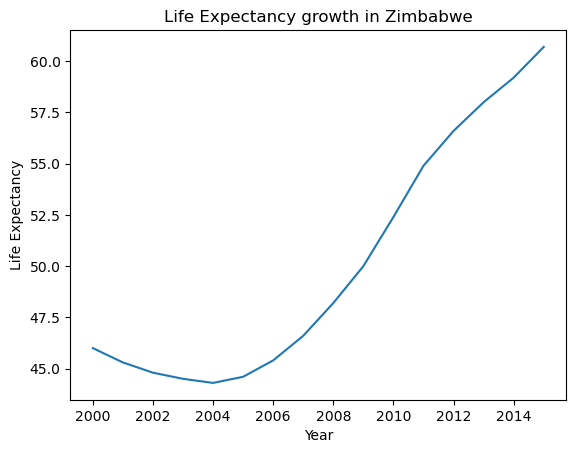



Absolute intervals of life expectancy in Zimbabwe
16.4
Absolute intervals of GDP in Zimbabwe
1.1888965007e+10


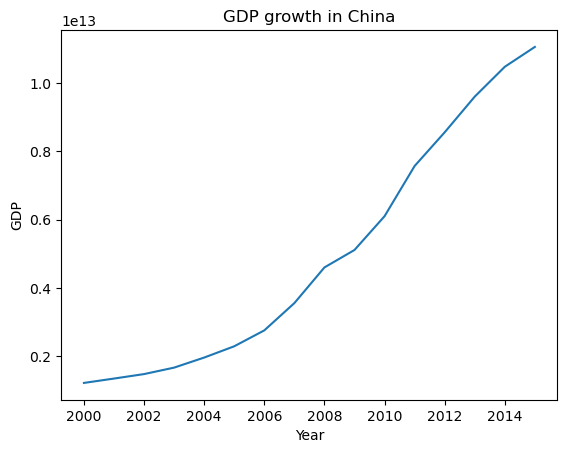

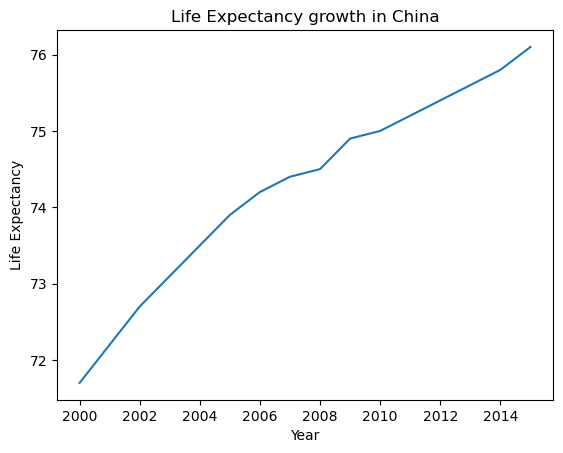



Absolute intervals of life expectancy in China
4.4
Absolute intervals of GDP in China
9.85335e+12


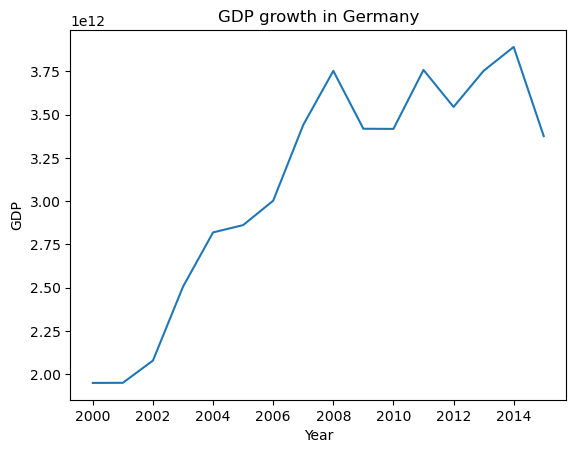

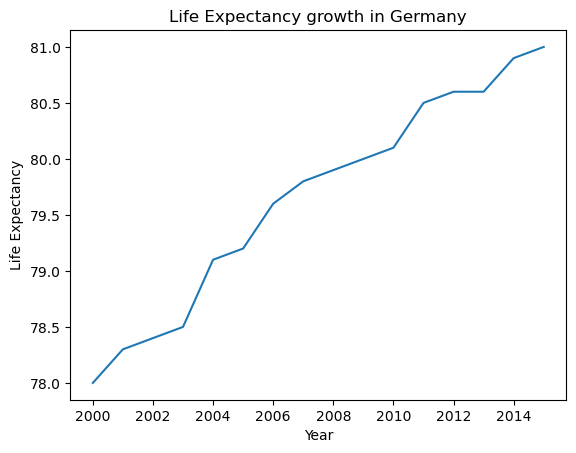



Absolute intervals of life expectancy in Germany
3.0
Absolute intervals of GDP in Germany
1.94066e+12


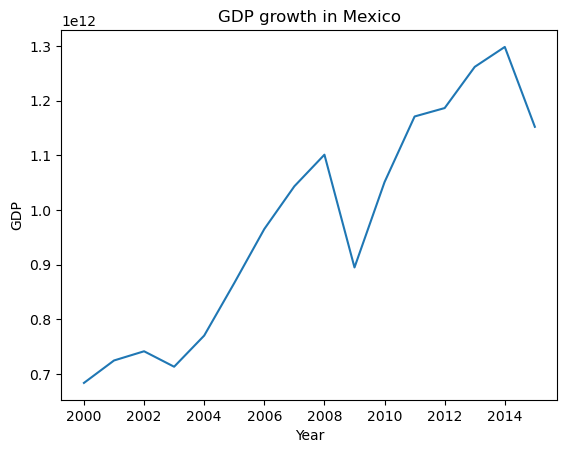

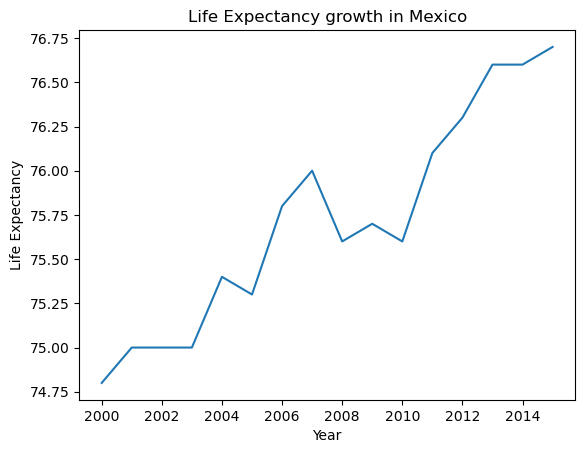



Absolute intervals of life expectancy in Mexico
1.9
Absolute intervals of GDP in Mexico
6.14812e+11


<Figure size 640x480 with 0 Axes>

In [170]:
years_list = data.Year.unique()
for country in countries:
    data_aux = data[data.Country == country]
    plt.title("GDP growth in " + str(country))
    plt.plot(data_aux.Year, data_aux.GDP)
    plt.xlabel("Year")
    plt.ylabel("GDP")
    plt.show()
    plt.clf()
    plt.title("Life Expectancy growth in " + str(country))
    plt.plot(data_aux.Year, data_aux.life_expectancy)
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.show()
    plt.clf()
    max_GDP = data_aux.GDP.max()
    min_GDP = data_aux.GDP.min()
    max_le = data_aux.life_expectancy.max()
    min_le = data_aux.life_expectancy.min()
    print("\n")
    print("Absolute intervals of life expectancy in " + str(country))
    print(np.round(max_le - min_le, 2))
    print("Absolute intervals of GDP in " + str(country))
    print(np.format_float_scientific(max_GDP - min_GDP))



### Second conclusive statement
To provide further validation, I conducted an analysis of parallel plots showing the relationship between GDP and life expectancy for each country in our study. The plots clearly exhibit a strong covariance, confirming our earlier observations. 
Most countries experienced an absolute increase in life expectancy ranging from 1.9 to 4.4 years. However, Zimbabwe stands out as a notable exception, with an impressive increase of 16.4 years. This contrast indicates that increases in GDP appear to have a disproportionately significant impact on life expectancy in Zimbabwe compared to other countries, but as argued, it is due to health and infrastuctural upgrades nationally. In other words, it is important to note that this discrepancy can be attributed to the substantial disparity in health conditions that Zimbabwe faced in the year 2000.
If further digging was to be made, it would be interesting to explain the little dicrepancies in growth rates of life expectancy against GDP among the other non-outlyer countries. Variables related to public health policies, criminality, CO2 emissions, sedentarism, population's overall habits, etc. would be, potentially, interesting to cross-analize.